<a href="https://colab.research.google.com/github/sanjaysanju673/demo2/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

load data

In [ ]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


In [ ]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [ ]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


Total spending per customer

In [ ]:
total_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spending.columns = ['CustomerID', 'TotalSpending']

In [ ]:
customer_profile = customers.merge(total_spending, on='CustomerID', how='left')


In [ ]:
customer_profile.isnull().sum()


,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0
TotalSpending,1


Scale the features

In [ ]:
customer_profile['TotalSpending'] = customer_profile['TotalSpending'].fillna(customer_profile['TotalSpending'].mean())


Standardize the features before clustering

In [ ]:
customer_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    object 
 1   CustomerName    200 non-null    object 
 2   Region          200 non-null    object 
 3   SignupDate      200 non-null    object 
 4   TotalSpending   199 non-null    float64
 5   TotalSpending	  200 non-null    float64
dtypes: float64(2), object(4)
memory usage: 9.5+ KB


In [ ]:
customer_profile = customer_profile.drop(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], axis=1)


In [ ]:
customer_profile.isna().sum()

,0
TotalSpending,1
TotalSpending\t,0


In [ ]:
customer_profile['TotalSpending'] = customer_profile['TotalSpending'].fillna(customer_profile['TotalSpending'].mean())

In [ ]:
customer_profile.isna().sum()

,0
TotalSpending,0
TotalSpending\t,0


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_data)


In [ ]:
customer_profile['Cluster'] = kmeans.labels_


Evaluation metrics

In [ ]:
db_index = davies_bouldin_score(scaled_data, kmeans.labels_)
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)

In [ ]:
print(f"Number of clusters: {len(set(kmeans.labels_))}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Number of clusters: 5
Davies-Bouldin Index: 0.5182850026921919
Silhouette Score: 0.5329662006213387


In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
customer_profile['PCA1'] = pca_components[:, 0]
customer_profile['PCA2'] = pca_components[:, 1]

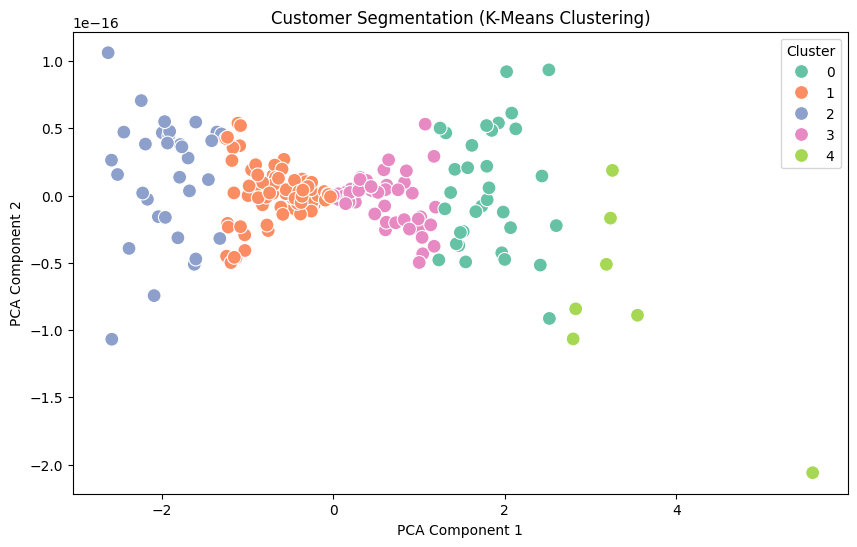

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_profile, palette='Set2', s=100)
plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()